# Exposition

An important task in the ecology of the Antarctic is to catalog the many different species of penguins in that area. Determining the species of a penguin often requires a combination of biological expertise and many precise measurements, which can be difficult to obtain.

Assume a future in which there are too many penguins. Due to the large population, taking measurements for each penguin would be unpractical. This is where the goal of our project comes in. By using at least three distinct machine learning algorithms and evaluating the results, we will determine which measurements are most predictive of a penguin's species. Our final set of models will include only one qualitative feature and two quantitative features.

To train and evaluate our models, we will use the Palmer Penguins data set, collected by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER Program.

# Data Import and Cleaning

Before we feed the data set into our machine learning algorithms, we will need to split and clean our data.


First, let's import the required libraries and data set:

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing

# import data
%config inlineBackend.figure_format = 'retina'
url = 'https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv'
penguins = pd.read_csv(url)

Let's take a peek at our unaltered data set:

In [2]:
penguins.head()

studyName  Sample Number                              Species  Region  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3   PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4   PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   

      Island               Stage Individual ID Clutch Completion  Date Egg  \
0  Torgersen  Adult, 1 Egg Stage          N1A1               Yes  11/11/07   
1  Torgersen  Adult, 1 Egg Stage          N1A2               Yes  11/11/07   
2  Torgersen  Adult, 1 Egg Stage          N2A1               Yes  11/16/07   
3  Torgersen  Adult, 1 Egg Stage          N2A2               Yes  11/16/07   
4  Torgersen  Adult, 1 Egg Stage          N3A1               Yes  11/16/07   

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \
0                39.1               18.7                181.0         3750.0   
1                39.5               17.4                186.0         3800.0   
2                40.3               18.0                195.0         3250.0   
3                 NaN                NaN                  NaN            NaN   
4                36.7               19.3                193.0         3450.0   

      Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0    MALE                NaN                NaN   
1  FEMALE            8.94956          -24.69454   
2  FEMALE            8.36821          -25.33302   
3     NaN                NaN                NaN   
4  FEMALE            8.76651          -25.32426   

                         Comments  
0  Not enough blood for isotopes.  
1                             NaN  
2                             NaN  
3              Adult not sampled.  
4                             NaN

The raw data set has sixteen columns:

 - studyName: Name of the study the penguin was in

 - Sample Number: Sample number of the penguin

 - Species: Species of the penguin

 - Region: Region the penguin was found in; in this data set, all penguins were found in the Anvers Island region

 - Island: Smaller island within Anvers Island that the penguin was found in (Torgerson = Torgersen Island, Dream = Dream Island, Biscoe = Biscoe Island)

 - Stage: Stage of life of the penguin

 - Individual ID: Unique ID of the penguin

 - Clutch Completion: Clutch completion status (Yes = the study nest was observed with a full clutch, No = the study nest was not observed with a full clutch)

 - Date Egg: Date the study nest was observed with one egg

 - Culmen Length: Length of the upper ridge of the penguin's beak, in millimeters

 - Culmen Depth: Depth of the upper ridge of the penguin's beak, in millimeters

 - Flipper Length: Length of the penguin's flipper, in millimeters

 - Body Mass: Body mass of the penguin, in grams

 - Sex: Sex of the penguin (Female, Male)

 - Delta 15 N: Measure of the ratio of stable isotopes 15N:14N

 - Delta 13 C: Measure of the ratio of stable isotopes 13C:12C


Looking at the columns, we can see that some measurements either cannot be used in our project as they are unique to each individual penguin or do not provide relevant information—studyName, Sample Number, Region, Stage, Individual ID, Clutch Completion, and Date Egg. In cleaning the data, we will remove these columns from the data frame. Before we clean, however, we need to split the data to ensure that information from our cleaning process doesn’t accidentally pollute the test set.


We will split the data into training and testing data, which will be 80% and 20% of the rows, respectively:

In [3]:
# split data into training and test groups
from sklearn.model_selection import train_test_split

np.random.seed(123)
train, test = train_test_split(penguins, test_size = 0.2)

Let's place our cleaning operations into a function:

In [4]:
def PenguinsClean(penguins):
    '''
    Cleans the penguins data and encodes the categorical variables

    Arguments:
    penguins: pandas DataFrame, inputted unclean DataFrame

    Returns:
    penguins: pandas DataFrame, cleaned DataFrame
    '''

    # Drop unused columns
    penguins = penguins.drop(["studyName", "Individual ID", "Clutch Completion", "Comments", "Date Egg", "Stage", "Sample Number", "Region"], axis=1)

    # Drop rows with NaN values
    penguins = penguins.dropna()

    # remove the row where the sex of the penguin was not recorded
    penguins = penguins[penguins['Sex'] != '.']

    # Label encode categorical variables
    le = preprocessing.LabelEncoder()
    penguins["Sex"] = le.fit_transform(penguins["Sex"])
    penguins["Island"] = le.fit_transform(penguins["Island"])
    penguins["Species"] = le.fit_transform(penguins["Species"])

    return penguins

Now we will clean the previously-split data:

In [5]:
clean_train = PenguinsClean(train)
clean_test = PenguinsClean(test)

# Explanatory Analysis

The next step is to compute summary statistics and construct visualizations about the relationships between the variables in the data set.

<br>

First, clean the entire data set. Since the values we require for the visualizations and summary statistics vary slightly from those we need for the training and testing sets, we will create a new function for this purpose.

In [6]:
def PenguinsCleanAnalysis (penguins):
  '''
  A function that cleans the penguin data set for analysis by dropping unused columns

  Arguments:
  penguins: Pandas data frame, the unclean data frame

  Returns:
  penguins: Pandas data frame, the cleaned data frame
  '''
  # drop unused columns
  penguins = penguins.drop(["studyName", "Individual ID", "Clutch Completion", "Comments", "Date Egg", "Stage", "Sample Number", "Region"], axis = 1)
  # shorten species names
  penguins["Species"] = penguins["Species"].str.split().str.get(0)
  # remove the row where the sex of the penguin was not recorded
  penguins = penguins[penguins['Sex'] != '.']


  return penguins

penguins_analysis = PenguinsCleanAnalysis(penguins)

Now that our data is appropriately cleaned, let's create Figure 1. We will create a scatterplot matrix, which is useful when comparing several features at once. Furthermore, we will set the hue to vary by species so we can more clearly visualize the differences and trends from species to species.

/Users/romygou/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


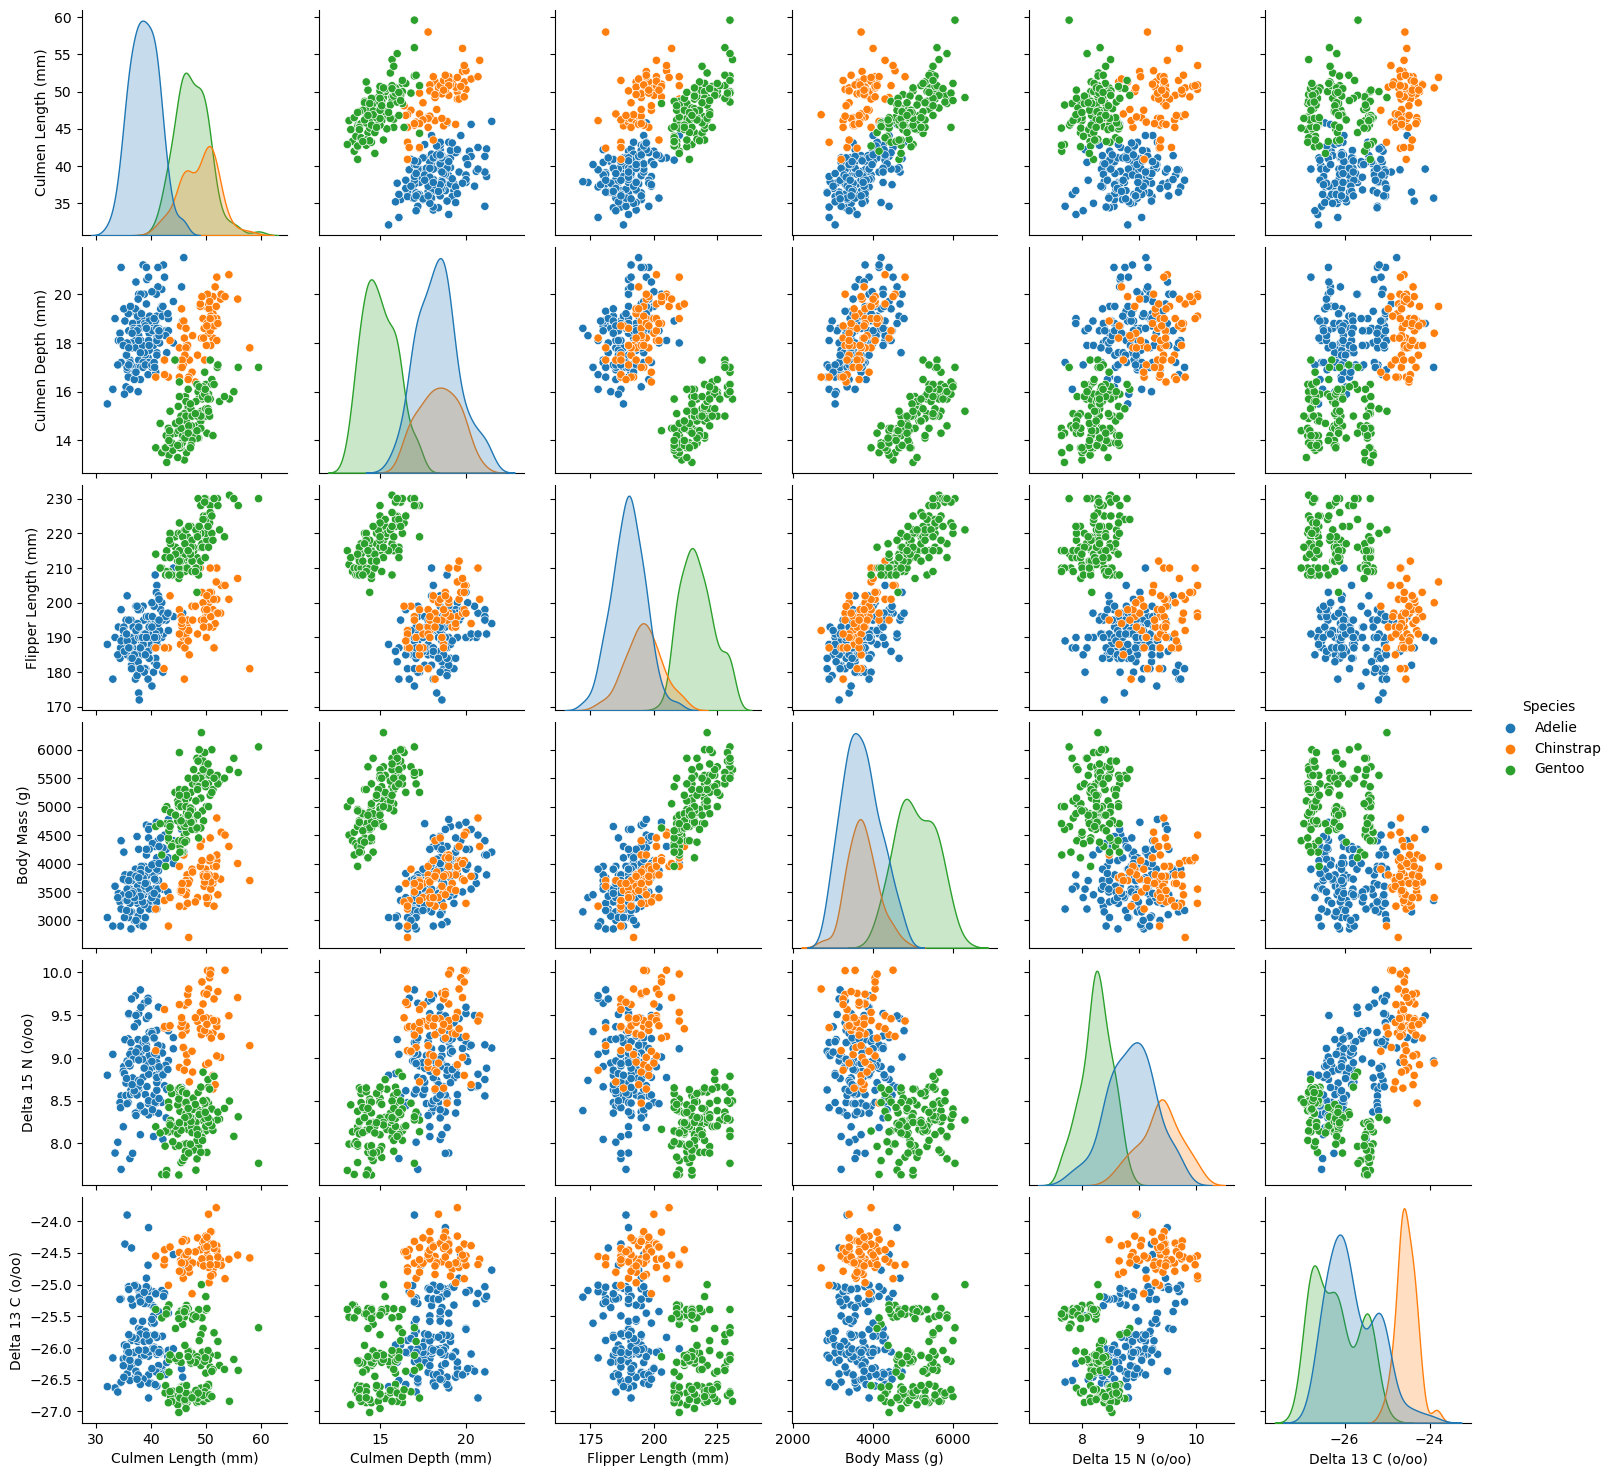

In [7]:
# Figure 1 - Scatterplot Matrix
sns.pairplot(penguins_analysis, hue = "Species")

Looking at the matrix above, we will notice that some subplots contain many overlapping points and others less so. The subplots where the three species have the littlest overlap show which features are more desirable in predicting a penguin's species. These plots seem to be ones that compare flipper length and culmen length, delta 15 N and culmen length, delta 13 C and culmen length, culmen depth and culmen length, and culmen length and body mass.

For Figure 2, we will create histograms in which we give each species a unique color so we can analyze the distribution of each feature individually.

Text(0.5, 1.0, 'Figure 2.6: Delta 13 C')

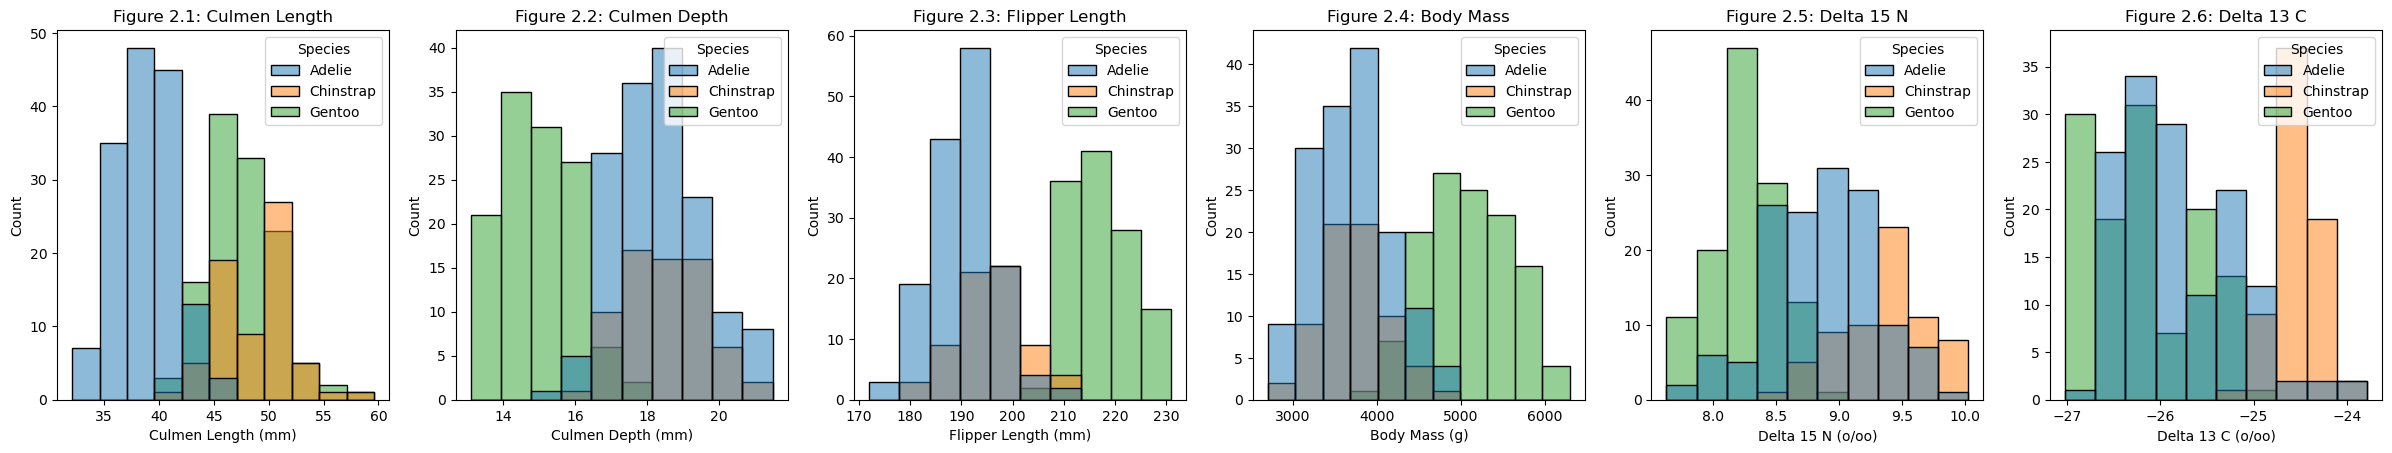

In [34]:
# Figure 2 - Histograms
fig, ax = plt.subplots(1, 6)
fig.set_figwidth(30)
sns.histplot(penguins_analysis, ax = ax[0], x = "Culmen Length (mm)", hue = "Species").set_title("Figure 2.1: Culmen Length")
sns.histplot(penguins_analysis, ax = ax[1], x = "Culmen Depth (mm)", hue = "Species").set_title("Figure 2.2: Culmen Depth")
sns.histplot(penguins_analysis, ax = ax[2], x = "Flipper Length (mm)", hue = "Species").set_title("Figure 2.3: Flipper Length")
sns.histplot(penguins_analysis, ax = ax[3], x = "Body Mass (g)", hue = "Species").set_title("Figure 2.4: Body Mass")
sns.histplot(penguins_analysis, ax = ax[4], x = "Delta 15 N (o/oo)", hue = "Species").set_title("Figure 2.5: Delta 15 N")
sns.histplot(penguins_analysis, ax = ax[5], x = "Delta 13 C (o/oo)", hue = "Species").set_title("Figure 2.6: Delta 13 C")

In Figure 2.1, we can see that there is plenty of overlap between the culmen lengths for the Chinstrap and Gentoo species. There is little overlap between the culmen lengths for the Adelie and Chinstrap species and the Adelie and Gentoo species. This suggests that this feature will not be useful for differentiating between the Chinstrap and Gentoo species.

In Figure 2.2, we can see that there is plenty of overlap between the culmen depths for the Chinstrap and Adelie species. There is little overlap between the culmen lengths for the Adelie and Gentoo species and the Chinstrap and Gentoo species. This suggests that this feature will not be useful for differentiating between the Chinstrap and Adelie species.

In Figure 2.3, we can see that there is plenty of overlap between the flipper lengths for the Adelie and Chinstrap species. There is little overlap between the flipper lengths for the Gentoo and Chinstrap species and the Adelie and Gentoo species. This suggests that this feature will not be useful for differentiating between the Adelie and Chinstrap species.

In Figure 2.4, we can see that there is plenty of overlap between the body masses for the Chinstrap and Adelie species. There is less overlap between the body masses for the Gentoo and Chinstrap species and the Adelie and Gentoo species. This suggests that this feature will not be useful for differentiating between the Chinstrap and Adelie species.

In Figure 2.5, we can see that there is plenty of overlap between the Delta 15 N's for the Adelie and Chinstrap species and the Adelie and Gentoo species. There is little overlap between the Delta 15 N's for the Chinstrap and Gentoo species. This suggests that this feature will not be useful for differentiating between the Adelie and Chinstrap species or the Adelie and Gentoo species.

In Figure 2.6, we can see that there is plenty of overlap between the Delta 13 C's for the Adelie and Chinstrap species and the Adelie and Gentoo species. There is little overlap between the Delta 13 C's for the Chinstrap and Gentoo species. This suggests that this feature will not be useful for differentiating between the Adelie and Chinstrap species or the Adelie and Gentoo species.

Text(0.5, 1.0, 'Figure 3.6: Delta 13 C')

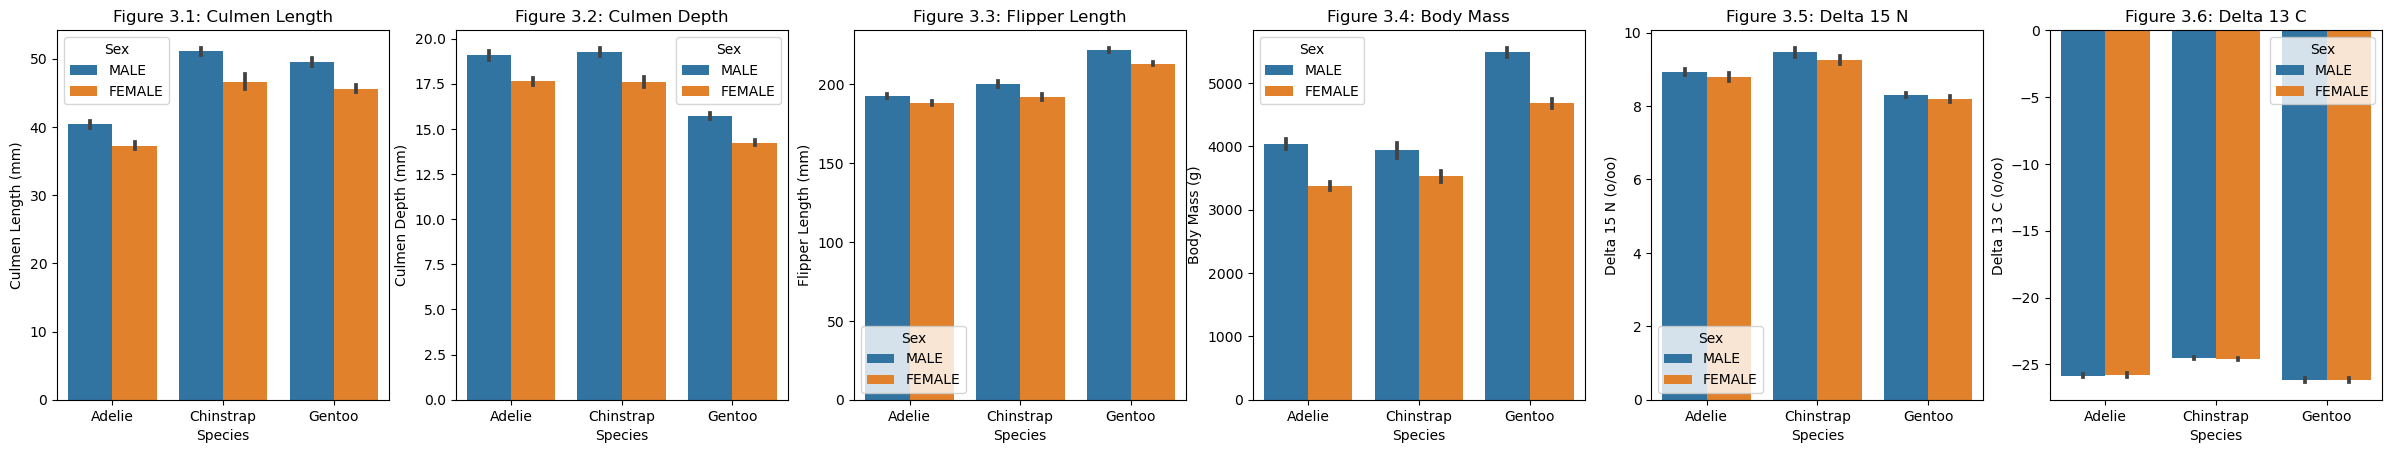

In [33]:
# Figure 3 - Bar Charts
fig, ax = plt.subplots(1, 6)
fig.set_figwidth(30)
sns.barplot(penguins_analysis, ax = ax[0], x = "Species", y  = "Culmen Length (mm)", hue = "Sex").set_title("Figure 3.1: Culmen Length")
sns.barplot(penguins_analysis, ax = ax[1], x = "Species", y  = "Culmen Depth (mm)", hue = "Sex").set_title("Figure 3.2: Culmen Depth")
sns.barplot(penguins_analysis, ax = ax[2], x = "Species", y  = "Flipper Length (mm)", hue = "Sex").set_title("Figure 3.3: Flipper Length")
sns.barplot(penguins_analysis, ax = ax[3], x = "Species", y  = "Body Mass (g)", hue = "Sex").set_title("Figure 3.4: Body Mass")
sns.barplot(penguins_analysis, ax = ax[4], x = "Species", y  = "Delta 15 N (o/oo)", hue = "Sex").set_title("Figure 3.5: Delta 15 N")
sns.barplot(penguins_analysis, ax = ax[5], x = "Species", y  = "Delta 13 C (o/oo)", hue = "Sex").set_title("Figure 3.6: Delta 13 C")

We can use the above bar charts to visualize the differences between the average feature measurements for the males and females of each species. As we can see, there is a very small difference between the averages of each sex when it comes to features like delta 15 N and delta 13 C. However, there is a larger difference in the sexes' average measurements for culmen length, culmen depth, flipper length, and body mass.


This suggests that culmen length, culmen depth, flipper length, and body mass in combination with sex could be a helpful predictor for species.

In [10]:
# Table 1
def penguin_summary_table (group_col, value_col):
    """"
    Creates a summary table by specific groups of penguin data colums
    Input:
      group_col: the columns that are grouped
      value_col: columns used for summary statistics
    Returns a data frame as a summary table
    """
    return penguins_analysis.groupby(group_col)[value_col].mean().round(2)

penguin_summary_table(["Species", "Sex"], ["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"])

Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
Species   Sex                                                                  
Adelie    FEMALE               37.26              17.62               187.79   
          MALE                 40.39              19.07               192.41   
Chinstrap FEMALE               46.57              17.59               191.74   
          MALE                 51.09              19.25               199.91   
Gentoo    FEMALE               45.56              14.24               212.71   
          MALE                 49.47              15.72               221.54   

                  Body Mass (g)  Delta 15 N (o/oo)  Delta 13 C (o/oo)  
Species   Sex                                                          
Adelie    FEMALE        3368.84               8.79             -25.79  
          MALE          4043.49               8.93             -25.83  
Chinstrap FEMALE        3527.21               9.25             -24.57  
          MALE          3938.97               9.46             -24.53  
Gentoo    FEMALE        4679.74               8.19             -26.20  
          MALE          5484.84               8.30             -26.17

Table 1 depicts the mean values of several different characteristics of penguins and allows us to see variation across sexes and species. Using numerical values instead of a visualization like the previous bar charts can be more useful when wanting to look at the details rather than the big picture.

As seen, the males tend to have larger metrics than their female counterparts. While the male and female penguins tend to have similar averages for their culmen depth, there is a larger difference between the averages of the sexes for features such as culmen length, flipper length, and body mass.

Comparing across species, the Gentoo has the two universally highest average measurements for male and female flipper lengths, followed by the Chinstrap male, Adelie male, Chinstap female, and Adelie female. The Gentoo penguins also have a much larger average body mass for both their males and females, with the Chinstrap and Adelie being quite similar.

This suggests that culmen length, flipper length, and body mass in combination with sex could be helpful for predicting species.

In [11]:
# Table 2
penguin_summary_table(["Species", "Island"], ["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"])

Culmen Length (mm)  Culmen Depth (mm)  \
Species   Island                                             
Adelie    Biscoe                  38.98              18.37   
          Dream                   38.50              18.25   
          Torgersen               38.95              18.43   
Chinstrap Dream                   48.83              18.42   
Gentoo    Biscoe                  47.53              14.98   

                     Flipper Length (mm)  Body Mass (g)  Delta 15 N (o/oo)  \
Species   Island                                                             
Adelie    Biscoe                  188.80        3709.66               8.82   
          Dream                   189.73        3688.39               8.95   
          Torgersen               191.20        3706.37               8.79   
Chinstrap Dream                   195.82        3733.09               9.36   
Gentoo    Biscoe                  217.19        5077.66               8.25   

                     Delta 13 C (o/oo)  
Species   Island                        
Adelie    Biscoe                -25.92  
          Dream                 -25.75  
          Torgersen             -25.76  
Chinstrap Dream                 -24.55  
Gentoo    Biscoe                -26.19

Table 2 depicts the variation in measurements based on the species and island of the penguins.

The table shows that while the Chinstraps and Gentoos both only reside on one island, the Adelies live on all three islands. There is not much of a difference between the average delta 15 N and delta 13 C values between islands and species. However, there is a larger difference in the average measurements for features like body mass and flipper length.


This suggests that body mass and flipper length in combination with island could be helpful for predicting species.

# Feature Selection

In the previous section, we used plots and tables to get an idea of the differences between the average measurements of species and sexes and hypothesized which features may be effective in predicting a penguin's species. In this section, we'll use feature selection to estimate which columns of the data set best predict a penguin's species.

We will use logistic regression to determine a single best subset of features, which we will then use for all three of our models.

First, we'll create a function that splits our training and testing data into two groups: X, which contains our predictor variables, and y, which contains our response variable, i.e. species.

In [12]:
def prep_penguin(data):
  '''
  A function that splits training and testing data into X and y variable groups

  Arguments:
  data: pandas data frame, either training or testing data

  Returns:
  X: pandas data frame, contains predictor variables only
  y: pandas data frame, contains the response variable only
  '''
  dataset = data.copy()
  X = dataset.drop(["Species"], axis = 1)
  y = dataset["Species"]

  return(X,y)

In [13]:
X_train, y_train = prep_penguin(clean_train)
X_test, y_test = prep_penguin(clean_test)

Let's first estimate the predictive performance of a model with all columns using logistic regression:

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

LR = LogisticRegression(max_iter = 1000)
print("CV score:", cross_val_score(LR, X_train, y_train).mean())

CV score: 0.9961538461538462


This is a great score. But this model uses all columns from the data set—can we achieve a similar model performance by using a subset of only three features to predict species?

To answer this question, we'll write a function that estimates model performance for a subset of features rather than the full data set. To estimate performance, we've been using the concept of cross-validation. Cross-validation is used in machine learning to estimate the skill of a model on unseen data—it uses training data to estimate how the model is expected to perform when used to make predictions on data not included during the training of the model, i.e. the testing data.

Note that we are using cross-validation instead of calculating a test score, to avoid "cheating" and looking at the test results before fitting our models.

In [15]:
def train_col_score(cols):
    '''
    Trains and evaluates a model via cross-validation on the columns in cols and returns the CV score.

    Arguments:
    cols: list, columns to evaluate

    Returns:
    CV score
    '''
    print("Features:", str(cols))

    LR = LogisticRegression(max_iter = 1000)
    return cross_val_score(LR, X_train[cols], y_train).mean()

Now, let's create a list of all possible subset combinations that contain one qualitative feature and two quantitative features:

In [16]:
combos = [["Island", "Culmen Length (mm)", "Culmen Depth (mm)"],
          ["Island", "Culmen Length (mm)", "Flipper Length (mm)"],
          ["Island", "Culmen Length (mm)", "Body Mass (g)"],
          ["Island", "Culmen Length (mm)", "Delta 15 N (o/oo)"],
          ["Island", "Culmen Length (mm)", "Delta 13 C (o/oo)"],
          ["Island", "Culmen Depth (mm)", "Flipper Length (mm)"],
          ["Island", "Culmen Depth (mm)", "Body Mass (g)"],
          ["Island", "Culmen Depth (mm)", "Delta 15 N (o/oo)"],
          ["Island", "Culmen Depth (mm)", "Delta 13 C (o/oo)"],
          ["Island", "Flipper Length (mm)", "Body Mass (g)"],
          ["Island", "Flipper Length (mm)", "Delta 15 N (o/oo)"],
          ["Island", "Flipper Length (mm)", "Delta 13 C (o/oo)"],
          ["Island", "Body Mass (g)", "Delta 15 N (o/oo)"],
          ["Island", "Body Mass (g)", "Delta 13 C (o/oo)"],
          ["Island", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"],
          ["Sex", "Culmen Length (mm)", "Culmen Depth (mm)"],
          ["Sex", "Culmen Length (mm)", "Flipper Length (mm)"],
          ["Sex", "Culmen Length (mm)", "Body Mass (g)"],
          ["Sex", "Culmen Length (mm)", "Delta 15 N (o/oo)"],
          ["Sex", "Culmen Length (mm)", "Delta 13 C (o/oo)"],
          ["Sex", "Culmen Depth (mm)", "Flipper Length (mm)"],
          ["Sex", "Culmen Depth (mm)", "Body Mass (g)"],
          ["Sex", "Culmen Depth (mm)", "Delta 15 N (o/oo)"],
          ["Sex", "Culmen Depth (mm)", "Delta 13 C (o/oo)"],
          ["Sex", "Flipper Length (mm)", "Body Mass (g)"],
          ["Sex", "Flipper Length (mm)", "Delta 15 N (o/oo)"],
          ["Sex", "Flipper Length (mm)", "Delta 13 C (o/oo)"],
          ["Sex", "Body Mass (g)", "Delta 15 N (o/oo)"],
          ["Sex", "Body Mass (g)", "Delta 13 C (o/oo)"],
          ["Sex", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]]

for cols in combos:
    cv_score = train_col_score(cols)
    print("CV score:", str(cv_score), "\n")

Features: ['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)']
CV score: 0.965457184325109 

Features: ['Island', 'Culmen Length (mm)', 'Flipper Length (mm)']
CV score: 0.950290275761974 

Features: ['Island', 'Culmen Length (mm)', 'Body Mass (g)']
CV score: 0.9655297532656023 

Features: ['Island', 'Culmen Length (mm)', 'Delta 15 N (o/oo)']
CV score: 0.9539912917271408 

Features: ['Island', 'Culmen Length (mm)', 'Delta 13 C (o/oo)']
CV score: 0.9502177068214804 

Features: ['Island', 'Culmen Depth (mm)', 'Flipper Length (mm)']
CV score: 0.8167634252539913 

Features: ['Island', 'Culmen Depth (mm)', 'Body Mass (g)']
CV score: 0.8091436865021769 

Features: ['Island', 'Culmen Depth (mm)', 'Delta 15 N (o/oo)']
CV score: 0.8246008708272858 

Features: ['Island', 'Culmen Depth (mm)', 'Delta 13 C (o/oo)']
CV score: 0.9196661828737301 

Features: ['Island', 'Flipper Length (mm)', 'Body Mass (g)']
CV score: 0.7328011611030479 

Features: ['Island', 'Flipper Length (mm)', 'Delta 15 N (o/oo)'

We can see that the subset with the highest CV score is ["Sex", "Culmen Length (mm)", "Body Mass (g)"].

This result makes sense with the plots and tables in the previous section. In Figure 1, we noted that the graph comparing Culmen Length and Body Mass had little overlap between species, and in Figure 3 and Table 1, we noted that there were noticeable differences in the sexes' average measurements for these features.

# Modeling

In this section, we will choose three machine learning models and evaluate their performances.

But first, we need to set up the functions for visualizing the confusion matrix and decision regions for the models.

A confusion matrix summarizes the performance of the algorithm by comparing the predicted and actual values of the response variable. It possesses the following structure:

\begin{equation}
\left[
   \begin{matrix}
    \text{true positive}&\text{false positive}\\
    \text{false negative}&\text{true negative}
   \end{matrix}
\right]
\end{equation}

Let's write a function that plots this matrix:

In [17]:
from sklearn.metrics import confusion_matrix

def confusion_mat(cm):
  '''
  A function that produces a confusion matrix plot

  Arguments:
  cm: confusion matrix

  Returns:
  A confusion matrix plot
  '''
  sns.heatmap(cm,
              annot = True,
              fmt = "g",
              xticklabels = ["Adelie", "Chinstrap", "Gentoo"],
              yticklabels = ["Adelie", "Chinstrap", "Gentoo"])
  plt.ylabel("Prediction", fontsize = 13)
  plt.xlabel("Actual", fontsize = 13)
  plt.title("Confusion Matrix", fontsize = 17)
  plt.show()

Now, let's move onto the decision region plots. Decision region plots are a useful tool for understanding how a model goes about the prediction task and how it decides to divide the input feature space by class label.

Since decision regions work best with only two numerical features, we'll need to split our test data based on the qualitative variable, sex, so that we'll end up with two plots:

In [18]:
# subset chosen predictors
X = X_test[["Sex", "Culmen Length (mm)", "Body Mass (g)"]]

# male penguins only
X_male = X[X["Sex"] == 1]
y_male = y_test[y_test.index.isin(X_male.index)]
# drop Sex column
X_male = X_male.drop(["Sex"], axis = 1)

# female penguins only
X_female = X[X["Sex"] == 0]
y_female = y_test[y_test.index.isin(X_female.index)]
# drop Sex column
X_female = X_female.drop(["Sex"], axis = 1)

Let's write a function that creates the two decision region plots:

In [19]:
import matplotlib.patches as mpatches

def plot_regions(model1, X1, y1, model2, X2, y2, col1, col2):
    '''
    A function to plot decision regions for a specified classification model

    Arguments:
    model1: the first fitted machine learning model, for males
    X1: the predictor variables of the data
    y1: the response variable of the data

    model2: the second fitted machine learning model, for females
    X2: the predictor variables of the data
    y2: the response variable of the data

    col1: string, name of the first variable to be plotted
    col2: string, name of the second variable to be plotted

    Returns:
    Plotted decision regions
    '''

    x0 = X1[col1]
    x1 = X1[col2]

    # create a 2D grid of 501 x 501 points
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)

    # reshape xx and yy to look more like the columns of a data frame
    # use np.ravel() to reduce array to 1D
    # use the numpy concatenation operator np.c_ to join the two parts of the grid together
    XX = xx.ravel()
    YY = yy.ravel()
    XY = pd.DataFrame({
        col1 : XX,
        col2 : YY
        })

    # make prediction
    p = model1.predict(XY)
    # reshape the predictions back into a square grid to plot
    p = p.reshape(xx.shape)

    # create the first plot
    fig, ax = plt.subplots(1,2)
    fig.set_figheight(4)
    fig.set_figwidth(10)
    ax[0].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
    ax[0].scatter(x0, x1, c = y1, cmap = "jet", vmin = 0, vmax = 2)
    ax[0].set_title("Male")
    ax[0].set_xlabel(col1)
    ax[0].set_ylabel(col2)

    # repeat process for second plot
    x0 = X2[col1]
    x1 = X2[col2]

    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)

    XX = xx.ravel()
    YY = yy.ravel()
    XY = pd.DataFrame({
        col1 : XX,
        col2 : YY
        })

    p = model2.predict(XY)
    p = p.reshape(xx.shape)

    # create the second plot
    ax[1].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
    ax[1].scatter(x0, x1, c = y2, cmap = "jet", vmin = 0, vmax = 2)
    ax[1].set_title("Female")
    ax[1].set_xlabel(col1)
    ax[1].set_ylabel(col2)

    # create a legend
    blue_patch = mpatches.Patch(color = "blue", label = "Adelie")
    green_patch = mpatches.Patch(color = "green", label = "Chinstrap")
    red_patch = mpatches.Patch(color = "red", label = "Gentoo")
    plt.legend(handles = [blue_patch, green_patch, red_patch], bbox_to_anchor = (1.05, 0.7), loc = 'upper left')

Now we can move onto fitting our machine learning models!

## Multinomial Logistic Regression

Our first machine learning model is a multinomial logistic regression model. The multinomial logistic regression algorithm is an extension of binary logistic regression, allowing us to utilize more than two predictor variables. It uses maximum likelihood estimation to evaluate the probability of categorical membership and models the relationship between the predictors and the response as a linear function.

First, we will subset our data set to include only the columns we previously determined to be the most successful at predicting species. Next, we will fit the training data to the logistic regression model. Then, we will test this model on the testing data to analyze the model's performance with unseen data. Lastly, we will score how well the model predicted the testing data.

In [20]:
# Model 1 - Logistic Regression

# subsetting data
X_train_model = X_train[["Sex", "Culmen Length (mm)", "Body Mass (g)"]]
X_test_model = X_test[["Sex", "Culmen Length (mm)", "Body Mass (g)"]]

# find best c value
c_vals = np.linspace(0.01,1,20)
top_score = 0
scores = []

# loop through all possible values
for c in c_vals:
  LR = LogisticRegression(C = c, max_iter = 1000)
  LR.fit(X_train_model, y_train)
  scores.append(cross_val_score(LR, X_train_model, y_train).mean())
  # if the latest score is greater than the current top score, replace it
  if scores[-1] > top_score:
    best_c = c
    top_score = scores[-1]

print("The best c value is:", best_c)
print("The best CV score is:", top_score)

LR = LogisticRegression(C = best_c, max_iter = 1000)
LR.fit(X_train_model, y_train)

print("The test score is:", LR.score(X_test_model, y_test))

The best c value is: 0.37473684210526315
The best CV score is: 0.9770682148040638
The test score is: 0.967741935483871


The test score is approximately 0.968, meaning that the logistic regression model correctly determined the species of approximately 96.8% of the penguins in the unseen data set.

Next, let's calculate the confusion matrix for this data using logistic regression. We will create an array of predictions for the response from the predictors in our test data, then create a confusion matrix with our observed and predicted response values.

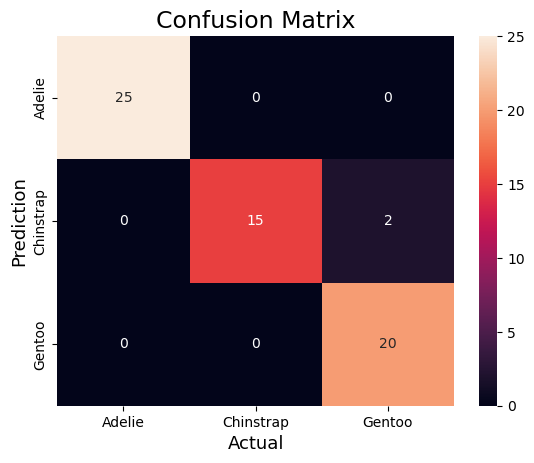

In [21]:
# predicted response values
y_preds = LR.predict(X_test_model)

cm = confusion_matrix(y_test, y_preds)
confusion_mat(cm)

Finally, we'll plot the decision regions:

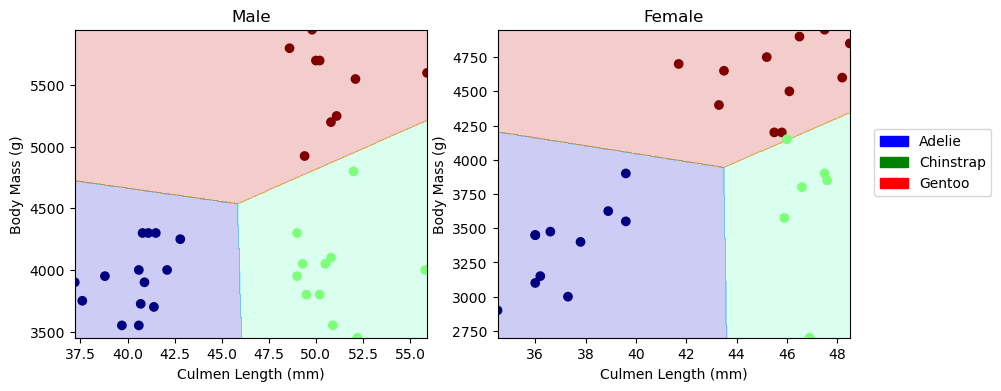

In [22]:
# decision region plot

# fit male data set
LR_male = LogisticRegression(C = best_c, max_iter = 1000)
LR_male.fit(X_male, y_male)

#fit female data set
LR_female = LogisticRegression(C = best_c, max_iter = 1000)
LR_female.fit(X_female, y_female)

plot_regions(LR_male, X_male, y_male, LR_female, X_female, y_female, "Culmen Length (mm)", "Body Mass (g)")

Using these plots and the confusion matrix, we can see where the logistic regression model made mistakes. For males, it seems to have predicted the species of all the penguins correctly. However, for females, it ran into some trouble predicting the species of a few Gentoo penguins. This is likely because the culmen length and body mass of the female Chinstrap penguins possessed a weaker linear relationship compared to those of the species and sexes, making the logistic regression model less accurate for this subset of penguins.


In conclusion, the high test score, confusion matrix, and decision region plots suggest that the relationship between species, sex, culmen length, and body mass is linear or can be modeled very accurately through a linear relationship. The logistic regression model works well for predicting species based on sex, culmen length, and body mass.

## K-Nearest Neighbors

Our second machine learning model is a k-nearest neighbors model. The KNN algorithm assumes that similar data points exist in close proximity. Working on this assumption, it attempts to predict the correct class for the test data by calculating the distance between a point in the test data and all the training points. It sorts these distances and selects the K points closest to the test data point. Finally, it calculates the probability of the test data point belonging to each of the classes of K points; the class with the highest probability is selected.

First, we fit our previously subsetted training data to the KNN model. Then, we will test this model on the testing data to analyze the model's performance with unseen data. Lastly, we will score how well the model predicted the testing data.

In [23]:
# Model 2 - K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# find best n_neighbors value
k_vals = np.linspace(1,100,100).astype(int)
top_score = 0
scores = []

# loop through all possible values
for k in k_vals:
  KNN = KNeighborsClassifier(n_neighbors = k)
  KNN.fit(X_train_model, y_train)
  scores.append(cross_val_score(KNN, X_train_model, y_train).mean())
  # if the latest score is greater than the current top score, replace it
  if scores[-1] > top_score:
    best_k = k
    top_score = scores[-1]

print("The best n_neighbors value is:", best_k)
print("The best CV score is:", top_score)

KNN = KNeighborsClassifier(n_neighbors = best_k)
KNN.fit(X_train_model, y_train)

print("The test score is:", KNN.score(X_test_model, y_test))

The best n_neighbors value is: 1
The best CV score is: 0.7977503628447025
The test score is: 0.8548387096774194


The test score is approximately 0.855, meaning that the k-nearest neighbors model correctly determined the species of approximately 85.5% of the penguins in the unseen data set.

Next, let's calculate the confusion matrix for this data using KNN. We will create an array of predictions for the response from the predictors in our test data, then create a confusion matrix with our observed and predicted response values.

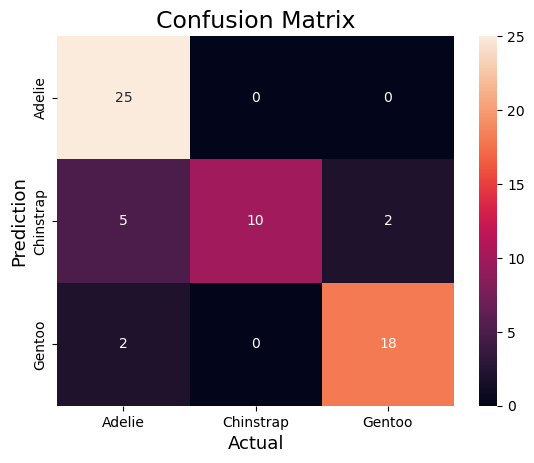

In [24]:
# predicted response values
y_preds = KNN.predict(X_test_model)

cm = confusion_matrix(y_test, y_preds)
confusion_mat(cm)

Finally, we'll plot the decision regions:

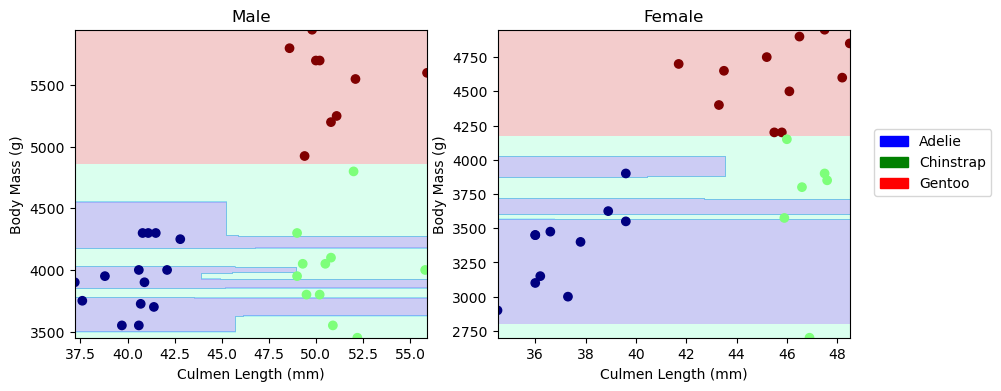

In [25]:
# decision region plot

# fit male data set
KNN_male = KNeighborsClassifier(n_neighbors = best_k)
KNN_male.fit(X_male, y_male)

#fit female data set
KNN_female = KNeighborsClassifier(n_neighbors = best_k)
KNN_female.fit(X_female, y_female)

plot_regions(KNN_male, X_male, y_male, KNN_female, X_female, y_female, "Culmen Length (mm)", "Body Mass (g)")

As seen in the plots and the confusion matrix, the KNN model seems to be able to predict the species of Gentoo and Adelie penguins fairly well, but it has many flaws when it comes to mistaking the Chinstrap species. One explanation for this could be that the three species just aren't grouped tightly enough and possess higher variation than desired when it comes to culmen length and body mass measurements. Another explanation is that since the KNN algorithm works best with variables of the same scale, the differing scales of culmen length and body mass may have negatively affected its performance.

In conclusion, the lower test score, confusion matrix, and decision region plots suggest that the KNN model does not work well for predicting species based on sex, culmen length, and body mass.

## Random Forest

Our third machine-learning model is a random forest model. A random forest algorithm takes the output of several decision trees and combines them. It selects random samples from the training data and constructs a decision tree for each sample. After each decision tree generates an output, the algorithm conducts a vote, where the most-voted prediction becomes the final prediction.

First, we fit our previously subsetted training data to the random forest model. Then, we will test this model on the testing data to analyze the model's performance with unseen data. Lastly, we will score how well the model predicted the testing data.

In [26]:
# Model 3 - Random Forest
from sklearn.ensemble import RandomForestClassifier

np.random.seed(123)

# find best n_estimator value
n_vals = np.linspace(100,120,20).astype(int)
top_score = 0
scores = []

# loop through all possible n_estimators values
for n in n_vals:
  RF = RandomForestClassifier(n_estimators = n)
  RF.fit(X_train_model, y_train)
  scores.append(cross_val_score(RF, X_train_model, y_train).mean())
  # if the latest score is greater than the current top score, replace it
  if scores[-1] > top_score:
    best_n = n
    top_score = scores[-1]

print("The best n_estimators value is:", best_n)

# find best max_depth value
depth_vals = np.linspace(1,20,20).astype(int)
top_score = 0
scores = []

# loop through all possible max_depth values
for depth in depth_vals:
  RF = RandomForestClassifier(n_estimators = best_n, max_depth = depth)
  RF.fit(X_train_model, y_train)
  scores.append(cross_val_score(RF, X_train_model, y_train).mean())
  # if the latest score is greater than the current top score, replace it
  if scores[-1] > top_score:
    best_depth = depth
    top_score = scores[-1]

print("The best max_depth value is:", best_depth)
print("The best CV score is:", top_score)

RF = RandomForestClassifier(n_estimators = best_n, max_depth = best_depth)
RF.fit(X_train_model, y_train)

print("The test score is:", RF.score(X_test_model, y_test))

The best n_estimators value is: 108
The best max_depth value is: 7
The best CV score is: 0.9810595065312047
The test score is: 0.967741935483871


The test score is approximately 0.968, meaning that the random forest model correctly determined the species of approximately 96.8% of the penguins in the unseen data set.

Next, let's calculate the confusion matrix for this data using random forests. We will create an array of predictions for the response from the predictors in our test data, then create a confusion matrix with our observed and predicted response values.

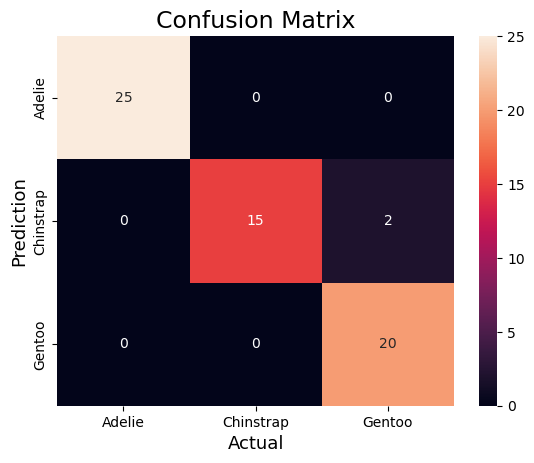

In [27]:
# predicted response values
y_preds = RF.predict(X_test_model)

cm = confusion_matrix(y_test, y_preds)
confusion_mat(cm)

Finally, we'll plot the decision regions:

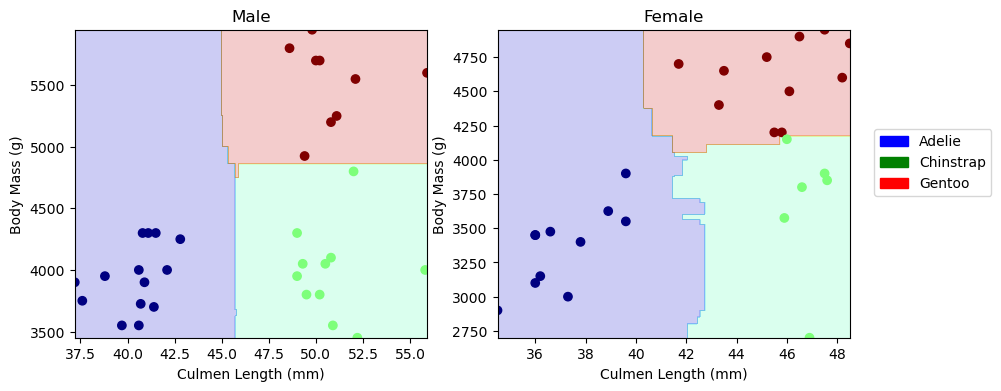

In [28]:
# decision region plot

# fit male data set
RF_male = RandomForestClassifier(n_estimators = best_n, max_depth = best_depth)
RF_male.fit(X_male, y_male)

#fit female data set
RF_female = RandomForestClassifier(n_estimators = best_n, max_depth = best_depth)
RF_female.fit(X_female, y_female)

plot_regions(RF_male, X_male, y_male, RF_female, X_female, y_female, "Culmen Length (mm)", "Body Mass (g)")

Unlike the logistical regression model, the random forest model doesn't require the decision boundaries to be straight lines. Thus, it has the potential to more accurately predict the data. As seen in the plots, there are very few data points that lie over the boundaries. As seen in the confusion matrix, only two penguins were predicted incorrectly.

In conclusion, the high test score, confusion matrix, and decision region plots suggest that the random forest model works well for predicting species based on sex, culmen length, and body mass.

# Discussion

Let's review the advantages and disadvantages of each machine-learning algorithm.



Logistical regression:

- Advantages:

  - It is easy to understand, implement, and interpret. It is also efficient.

  - It demonstrates good accuracy for simple data sets, especially when the variables of the data set can be decently modeled with a linear relationship.

- Disadvantages:

  - It constructs linear decision boundaries.

  - To perform its best, the assumptions of logistical regression must be met, meaning the data set must have a linear relationship, have low multicollinearity, possess independent observations, include no outliers, be of sufficiently large size, etc.

  - It does not perform well with complex relationships.

K-nearest neighbors:

- Advantages:

  - It is very simple to understand and implement.

- Disadvantages:

  - It has slow performance with large data sets. It took a long time to analyze and plot the penguins data.

  - It works best when features have the same scale, since absolute differences in features weigh the same. This may explain why it showed the worst performance on our chosen model, as sex, culmen length, and body mass are all variables with different scales.

  - Due to how it chooses neighbors based on distance, it is very sensitive to outliers.

Random forests:

- Advantages:

  - It works well with categorical and numerical data without requiring the scaling or transformation of variables beforehand.

  - It is not as easily influenced by outliers since it bins the variables.

  - It works well with both linearly and nonlinearly correlated variables.

- Disadvantages:

  - It has slower performance. It took a long time to choose the best hyperparameters for our model.

  - It is harder to interpret due to its complexity.

  - It requires more computational power compared to simpler machine learning algorithms.



To summarize, our logistic regression model and random forest model performed similarly well. The former wasn't very surprising, since we chose our subset based on a logistic regression model. Our KNN model performed the worst out of the three, perhaps due to the scales of the features, as noted previously.

In conclusion, we recommend using the predictors Sex, Culmen Length, and Body Mass with the random forest model. This is because although this model obtained the same test score as the logistic regression model, we believe the random forest model's flexibility when it comes to linear and nonlinear data and its nonlinear decision boundaries make it the most reliable out of the three algorithms when it comes to predictions.

To improve our predictions, we could either gather more observations to add to the data set or split the data 90%/10% so that the training set receives more data, since more training data may result in higher model accuracy.